<a href="https://colab.research.google.com/github/difarkry/code_materi/blob/main/tugaspertemuan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving frieren-beyond-3840x2160-22999.jpg to frieren-beyond-3840x2160-22999 (1).jpg


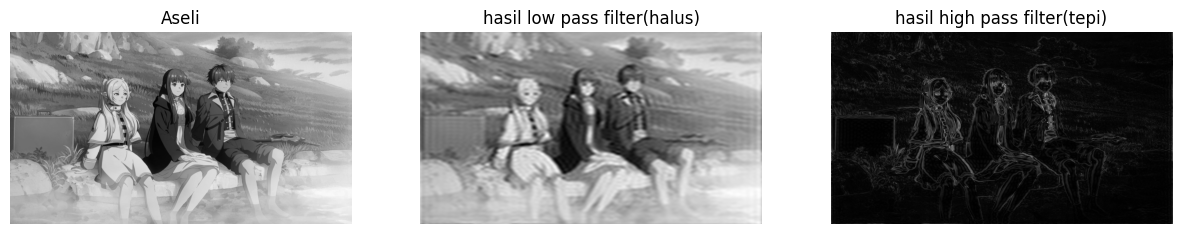

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# upload gambar
uploaded=files.upload()
filename=list(uploaded.keys())[0]

# buka dan konversi ke grayscale
img=Image.open(filename).convert("L")
img_a=np.array(img)

# transformasi fourier
f=np.fft.fft2(img_a)
fshift=np.fft.fftshift(f)

# Membuat filter low-pass dan high-pass
rows,cols = img_a.shape
crow,ccol=rows//2,cols//2

radius=50

lowPass=np.zeros((rows,cols),np.uint8)
lowPass[crow-radius:crow+radius,ccol-radius:ccol+radius]=1

highPass = 1-lowPass

fshift_low=fshift * lowPass
img_low= np.fft.ifft2(np.fft.ifftshift(fshift_low))
img_low=np.abs(img_low)

fshift_high=fshift*highPass
img_high = np.fft.ifft2(fshift_high)
img_high=np.abs(img_high)

# visualisasi
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.imshow(img_a,cmap='gray')
plt.title('Aseli')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_low,cmap='gray')
plt.title('hasil low pass filter(halus)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_high,cmap='gray')
plt.title('hasil high pass filter(tepi)')
plt.axis('off')

plt.show()
